In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carpeta donde se encuentra los dataset
#https://drive.google.com/drive/folders/1Uq6AL0-EYqvIJUXsC-Z2MUsU9tJTgsVy?usp=drive_link

In [3]:
# Paso 1: Cargar el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('Moocs/Coursera_reviews.csv')

In [17]:
df.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [4]:
# Paso 2: Explorar los primeros registros del DataFrame
print(df.head())

                                             reviews       reviewers  \
0  Pretty dry, but I was able to pass with just t...     By Robert S   
1  would be a better experience if the video and ...  By Gabriel E R   
2  Information was perfect! The program itself wa...      By Jacob D   
3  A few grammatical mistakes on test made me do ...       By Dale B   
4  Excellent course and the training provided was...       By Sean G   

   date_reviews  rating                 course_id  
0  Feb 12, 2020       4  google-cbrs-cpi-training  
1  Sep 28, 2020       4  google-cbrs-cpi-training  
2  Apr 08, 2020       4  google-cbrs-cpi-training  
3  Feb 24, 2020       4  google-cbrs-cpi-training  
4  Jun 18, 2020       4  google-cbrs-cpi-training  


In [5]:
# Paso 3: Obtener información general sobre el DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB
None


In [6]:
# Paso 4: Verificar y tratar los valores faltantes
print(df.isnull().sum())

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64


In [7]:
# Tratamiento de valores faltantes (ejemplo)
df = df.dropna()  # Eliminar filas con valores faltantes

In [8]:
# O
df['reviews'].fillna('sin dato', inplace=True)  # Rellenar valores faltantes con un valor específico

In [9]:
# Paso 5: Resumen estadístico del DataFrame
print(df.describe())

             rating
count  1.454571e+06
mean   4.696676e+00
std    6.982951e-01
min    1.000000e+00
25%    5.000000e+00
50%    5.000000e+00
75%    5.000000e+00
max    5.000000e+00


In [11]:
duplicates = df.duplicated()




In [12]:
print(df[duplicates])


                                                   reviews        reviewers  \
31       Solid presentation all the way through. I real...       By Logan D   
32       Probably the best certification course I've ta...      By Luis M C   
33       The ProctorU.com system took 2 times the amoun...       By scott w   
34       Covered all of the required information in an ...        By Ryan H   
35       Great course, lectures were straight forward a...      By Samuel D   
...                                                    ...              ...   
1454706                                                  g     By Brijesh K   
1454707                                                  .    By Vasavi V M   
1454708                                                  .     By Drishti D   
1454709                                                  .  By FAUSTINE F K   
1454710                                                  G        By Reza S   

         date_reviews  rating                 cours

In [13]:
df_cleaned = df.drop_duplicates()


In [15]:
df_cleaned.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [ ]:
df_cleaned.to_csv('coursera_review_cleaned.csv', index=False)


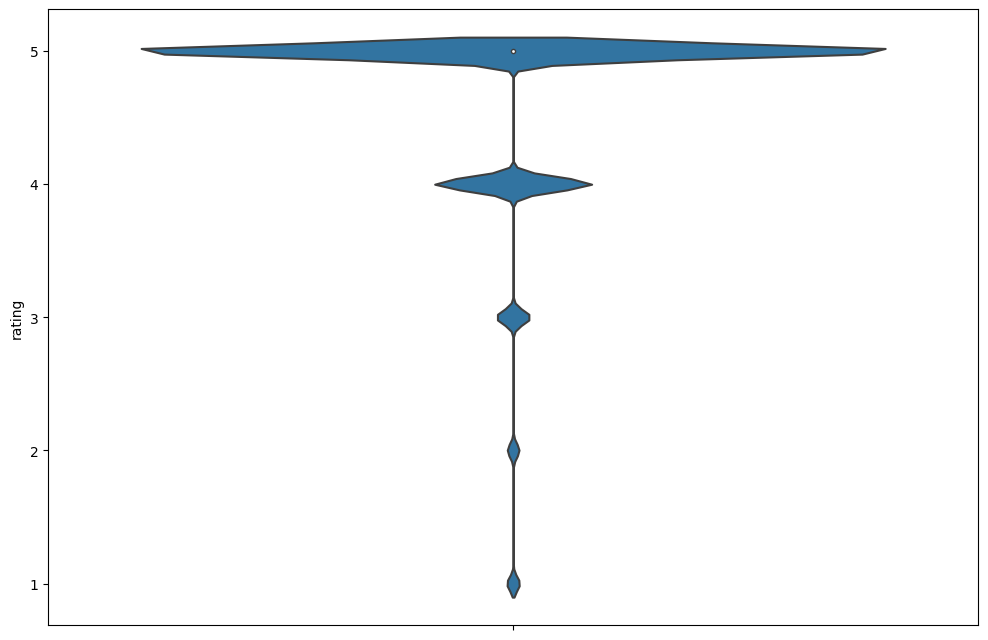

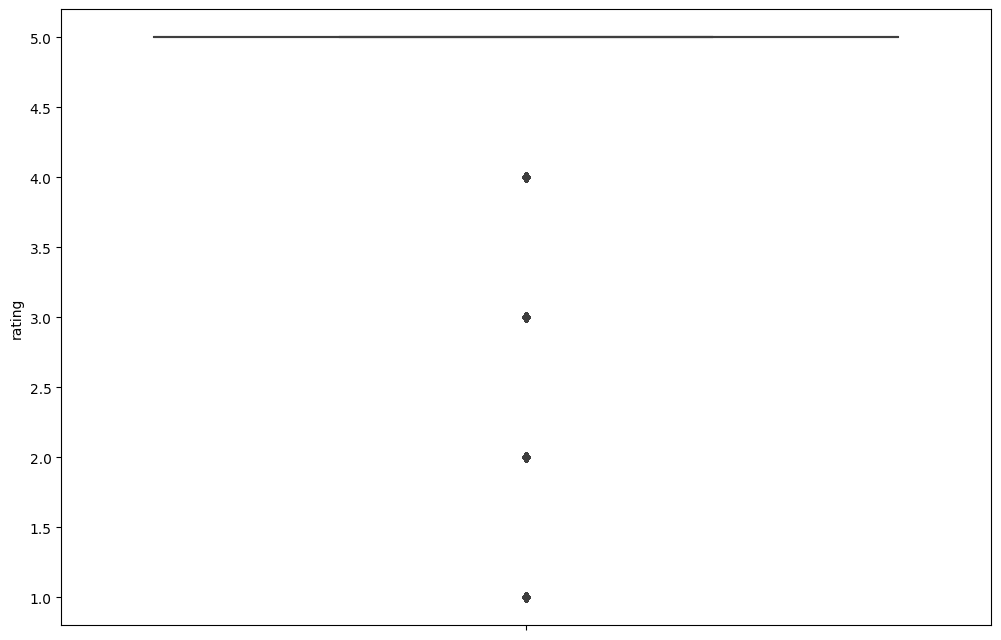

In [14]:
# Paso 6: Visualizar la distribución de las variables numéricas utilizando gráficos de violín y cajas
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_cleaned, y='rating')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, y='rating')
plt.show()

In [ ]:
# Paso 7: Visualizar la relación entre variables numéricas utilizando un gráfico de dispersión y una matriz de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='columna_numerica1', y='columna_numerica2')
plt.show()

plt.figure(figsize=(12, 10))
sns.pairplot(data=df, vars=['columna_numerica1', 'columna_numerica2', 'columna_numerica3'])
plt.show()

/var/folders/cf/5nv863qj24s_gxr8p3cmtljr0000gn/T/ipykernel_11081/2071140531.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


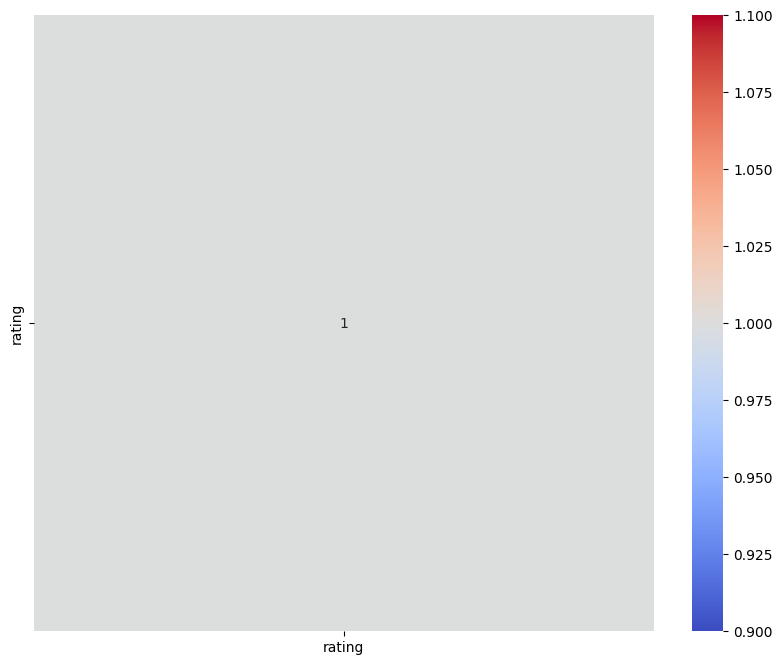

In [16]:
# Paso 8: Calcular la matriz de correlación y visualizarla como un mapa de calor
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Paso 9: Explorar las variables categóricas utilizando gráficos de barras y diagramas de dispersión
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='columna_categorica')
plt.show()

plt.figure(figsize=(10, 8))
sns.stripplot(data=df, x='columna_categorica', y='columna_numerica')
plt.show()

EDA + COMPLETO 

Gráficos interactivos utilizando Plotly:

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('ruta_del_archivo.csv')

# Gráfico interactivo de dispersión
fig = px.scatter(df, x='columna_numerica1', y='columna_numerica2', color='columna_categorica', hover_data=['columna_otra'])
fig.show()

# Gráfico interactivo de barras
fig = px.bar(df, x='columna_categorica', y='columna_numerica', color='columna_categorica', barmode='group')
fig.show()


Análisis de outliers utilizando Boxplot:

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('ruta_del_archivo.csv')

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='columna_numerica')
plt.show()


Análisis de datos geoespaciales utilizando Folium:

In [ ]:
import pandas as pd
import folium

df = pd.read_csv('ruta_del_archivo.csv')

# Crear un mapa centrado en una ubicación específica
m = folium.Map(location=[latitud_centro, longitud_centro], zoom_start=12)

# Agregar marcadores al mapa
for index, row in df.iterrows():
    folium.Marker([row['latitud'], row['longitud']], popup=row['informacion_adicional']).add_to(m)

# Mostrar el mapa
m
